# Cuadripolos elementales y sus matrices asociadas
<img src="./img/logo_UTN.svg" align="right" width="150" /> 

#### Por Mariano Llamedo Soria

### Resumen 
En este documento se presentan algunas de las capacidades que posee el módulo PyTC2 para operar con cuadripolos. Se muestran ejemplos de cómo definir redes y sus modelos Z, Y y $T_{ABCD}$ asociados, como también algunas redes que implementan dichos modelos.

* Funciones de dibujo de redes: [dibujar_Pi](), [dibujar_Tee]()
* Funciones de conversión y definición de cuadripolos: [Z2Tabcd_s](), [Y2Tabcd_s](), [TabcdY_s](), [TabcdZ_s](), [TabcdLZY_s](), 
* Funciones para presentación de markdown y latex: [print_latex](), [print_subtitle](), [a_equal_b_latex_s]()


### Introducción

A lo largo del curso se presentó una metodología sistemática para arribar a una función transferencia $T(s)$ a partir de restricciones de la función de módulo $\vert T(j\omega) \vert $ o retardo $ \tau(\omega) $. Si bien en primera instancia arribamos a una $T_{LP}(s)$ pasabajos, es posible mediante núcleos de transformación el pasaje a otro tipo de transferencias (pasa-alto, pasabanda, etc).




In [1]:
# Ahora importamos las funciones de PyTC2

from pytc2.dibujar import dibujar_Pi, dibujar_Tee, dibujar_lattice
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
#from pytc2.dibujar import dibujar_elemento_serie, dibujar_elemento_derivacion, dibujar_espaciador, dibujar_espacio_derivacion, dibujar_puerto_entrada, dibujar_puerto_salida
#from schemdraw.elements import  Resistor, ResistorIEC, Capacitor, Inductor, Line, Dot, Gap, Arrow
import sympy as sp
from IPython.display import display,  Markdown



### Impedancia serie

La matriz de parámetros Z para un cuadripolo constituido por una impedancia en serie **no está definida**. Esto se debe a que bajo las condiciones de medición de corriente nula (circuito abierto), ninguno de los parámetros $Z_{ii}$ está definido. Sin embargo, sí se puede calcular la matriz de parámetros Y

$$ 
Y_Z = \begin{pmatrix}
\frac{1}{Z} & -\frac{1}{Z} \\
-\frac{1}{Z} & \frac{1}{Z} \\
\end{pmatrix} = \frac{1}{Z} . \begin{pmatrix} 1 & -1 \\ -1 & 1 \\ \end{pmatrix}
$$

Veremos cómo podemos proceder para el análisis simbólico.


#### Impedancia en serie

<IPython.core.display.Math object>

#### Red equivalente

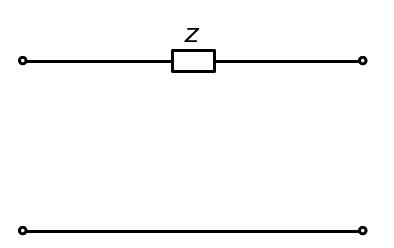

In [2]:
# Definimos la matriz Yz

Y, Z = sp.symbols('Y, Z', complex=True)

Yz = 1/Z * sp.Matrix([[1, -1], [-1, 1]])

print_subtitle('Impedancia en serie')
print_latex(a_equal_b_latex_s('Y_Z', Yz))

print_subtitle('Red equivalente')
dibujar_Pi(Yz)

### Admitancia (Y) en derivación

La matriz de parámetros Y para un cuadripolo constituido por una admitancia en derivación **no existe**, dado que para las condiciones de medición de tensión nula, ninguno de los parámetros está definido. Sería la condición dual de la *Z-serie* para los parámetros Z. Es decir que la matríz Z de la *Y-en-derivación* será

$$ 
Z_Y = \begin{pmatrix}
\frac{1}{Y} & \frac{1}{Y} \\
\frac{1}{Y} & \frac{1}{Y} \\
\end{pmatrix} = \frac{1}{Y} . \begin{pmatrix} 1 & 1 \\ 1 & 1 \\ \end{pmatrix}
$$



#### Admitancia en derivación

<IPython.core.display.Math object>

#### Red equivalente

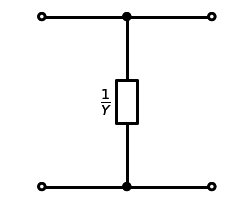

In [3]:
# Definimos la matriz Yz

Zy = 1/Y * sp.Matrix([[1, 1], [1, 1]])

print_subtitle('Admitancia en derivación')
print_latex(a_equal_b_latex_s('Z_Y', Zy))

print_subtitle('Red equivalente')
dibujar_Tee(Zy)

### Redes Pi y T (Tee)

La red T, o *Tee* por su denominación en inglés, está naturalmente asociada a los parámetros Z de cuadripolo, mientras que la Pi ($\pi$) se asocia a los parámetros Y.

$$ 
Z_T = \begin{pmatrix}
Z_a + Z_b & Z_b \\
Z_b & Z_c + Z_b \\
\end{pmatrix} 
$$



#### Red Tee

<IPython.core.display.Math object>

#### Red equivalente

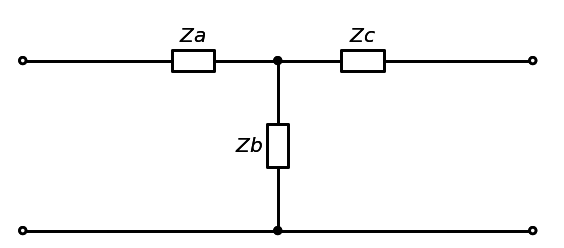

In [4]:
Za, Zb, Zc = sp.symbols('Za, Zb, Zc', complex=True)

Zt = sp.Matrix([[Za+Zb, Zb], [Zb, Zc+Zb]])

print_subtitle('Red Tee')
print_latex(a_equal_b_latex_s('Z_T', Zt))
print_subtitle('Red equivalente')
dibujar_Tee(Zt)

del mismo modo la red pi

$$ 
Y_{\pi} = \begin{pmatrix}
Y_a + Y_b & -Y_b \\
-Y_b & Y_c + Y_b \\
\end{pmatrix} 
$$


#### Red Pi

<IPython.core.display.Math object>

#### Red equivalente

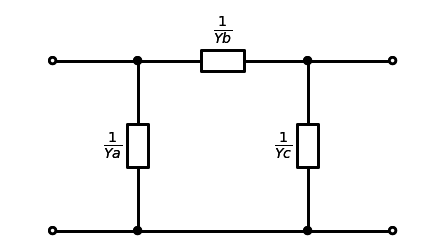

In [5]:
Ya, Yb, Yc = sp.symbols('Ya, Yb, Yc', complex=True)

Ypi = sp.Matrix([[Ya+Yb, -Yb], [-Yb, Yc+Yb]])

print_subtitle('Red Pi')
print_latex(a_equal_b_latex_s('Y_{\pi}', Ypi))

print_subtitle('Red equivalente')
dibujar_Pi(Ypi)

### Conversión de parámetros de cuadripolos

Los modelos de cuadripolos pueden convertirse mediante álgebra convencional, respetando las condiciones de medición de cada parámetro. En los siguientes ejemplos se muestran las funciones que permiten la conversión de parámetros de cuadripolo



## Conversión Z - Y

#### Red Tee original

<IPython.core.display.Math object>

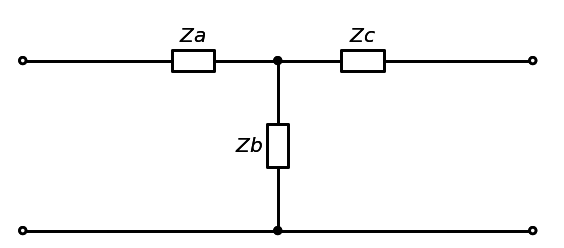

#### Conversión a Pi ([T. Kennelly](https://es.wikipedia.org/wiki/Teorema_de_Kennelly))

<IPython.core.display.Math object>

#### Red equivalente

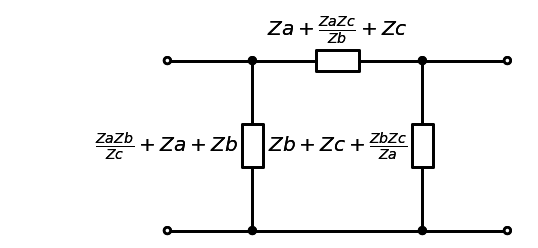

para mayor claridad, si se trabaja un poco más las expresiones de los componentes quedan

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
from pytc2.cuadripolos import Z2Tabcd_s, Y2Tabcd_s, Tabcd2Z_s, Tabcd2Y_s

display(Markdown('## Conversión Z - Y'))

print_subtitle('Red Tee original')

print_latex(a_equal_b_latex_s('Z_T', Zt))

dibujar_Tee(Zt)

print_subtitle('Conversión a Pi ([T. Kennelly](https://es.wikipedia.org/wiki/Teorema_de_Kennelly))')

print_latex(a_equal_b_latex_s('Y_T', Zt**-1))

print_subtitle('Red equivalente')

Yt_a, Yt_b, Yt_c = dibujar_Pi(Zt**-1, return_components = True)

display(Markdown('para mayor claridad, si se trabaja un poco más las expresiones de los componentes quedan'))

print_latex(a_equal_b_latex_s('Y_{At}', sp.simplify(sp.expand(Yt_a)) ))

print_latex(a_equal_b_latex_s('Y_{Bt}', sp.simplify(sp.expand(Yt_b)) ))

print_latex(a_equal_b_latex_s('Y_{Ct}', sp.simplify(sp.expand(Yt_c)) ))


## Conversión Y - Z

#### Red Pi original

<IPython.core.display.Math object>

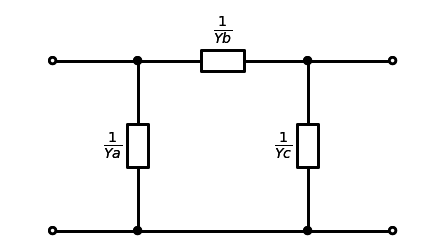

#### Conversión a Tee (T. Kennelly)

<IPython.core.display.Math object>

#### Red equivalente

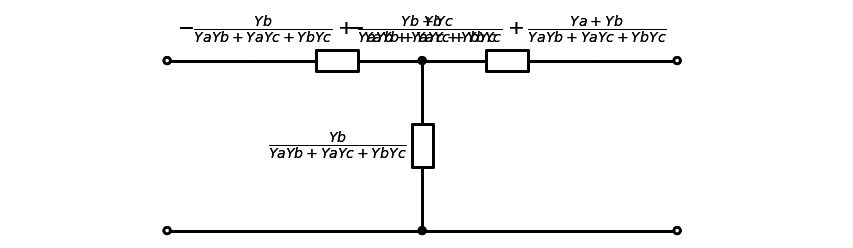

para mayor claridad, si se trabaja un poco más las expresiones de los componentes quedan

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

la similitud en las expresiones es evidente:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:

display(Markdown('## Conversión Y - Z'))

print_subtitle('Red Pi original')

print_latex(a_equal_b_latex_s('Y_{\pi}', Ypi))

dibujar_Pi(Ypi)

print_subtitle('Conversión a Tee (T. Kennelly)')

Zpi = Ypi**-1
print_latex(a_equal_b_latex_s('Z_{\pi}', Zpi))

print_subtitle('Red equivalente')

Zpi_a, Zpi_b, Zpi_c = dibujar_Tee(Zpi, return_components = True)

display(Markdown('para mayor claridad, si se trabaja un poco más las expresiones de los componentes quedan'))

print_latex(a_equal_b_latex_s('Z_{A\pi}', sp.simplify(sp.expand(Zpi_a)) ))

print_latex(a_equal_b_latex_s('Z_{B\pi}', sp.simplify(sp.expand(Zpi_b)) ))

print_latex(a_equal_b_latex_s('Z_{C\pi}', sp.simplify(sp.expand(Zpi_c)) ))


display(Markdown('la similitud en las expresiones es evidente:'))


print_latex( '$' + a_equal_b_latex_s('Y_{At}', sp.simplify(sp.expand(Yt_a)))[1:-1]  
                 + ' \qquad ' + 
                   a_equal_b_latex_s('Z_{A\pi}', sp.simplify(sp.expand(Zpi_a)))[1:-1] 
             + '$')

print_latex( '$' + a_equal_b_latex_s('Y_{Bt}', sp.simplify(sp.expand(Yt_b)))[1:-1]  
                 + ' \qquad ' + 
                   a_equal_b_latex_s('Z_{B\pi}', sp.simplify(sp.expand(Zpi_b)))[1:-1] 
             + '$')

print_latex( '$' + a_equal_b_latex_s('Y_{Ct}', sp.simplify(sp.expand(Yt_c)))[1:-1]  
                 + ' \qquad ' + 
                   a_equal_b_latex_s('Z_{C\pi}', sp.simplify(sp.expand(Zpi_c)))[1:-1] 
             + '$')


In [8]:

display(Markdown('## Conversión Z/Y a $T_{ABCD}$'))

print_subtitle('Redes sencillas Z-serie Y-derivación')

display(Markdown('Tomamos como referencia las matrices $Y_Z$ y $Z_Y$ definidas más arriba, luego su matriz $T_{ABCD}$ será para la Y-derivación'))

print_latex(a_equal_b_latex_s('Y_Z', Yz ))
print_latex(a_equal_b_latex_s('T_Z', Y2Tabcd_s(Yz)))

display(Markdown('mientras que para la Z-serie '))

print_latex(a_equal_b_latex_s('Z_Y', Zy ))
print_latex(a_equal_b_latex_s('T_Y', Z2Tabcd_s(Zy)))




## Conversión Z/Y a $T_{ABCD}$

#### Redes sencillas Z-serie Y-derivación

Tomamos como referencia las matrices $Y_Z$ y $Z_Y$ definidas más arriba, luego su matriz $T_{ABCD}$ será para la Y-derivación

<IPython.core.display.Math object>

<IPython.core.display.Math object>

mientras que para la Z-serie 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Dado que se trata de redes elementales, que mediante interconexión podrían conformar redes de complejidad arbitrariamente grande, existen otras formas más directas de definirlas

## Generación de matrices T de redes elementales (Z, Y, L)

#### Z-serie

<IPython.core.display.Math object>

#### Y-derivación

<IPython.core.display.Math object>

#### Red L (Y-Z)

<IPython.core.display.Math object>

por supuesto que se podría convertir la matriz T a Z y representar la red L

<IPython.core.display.Math object>

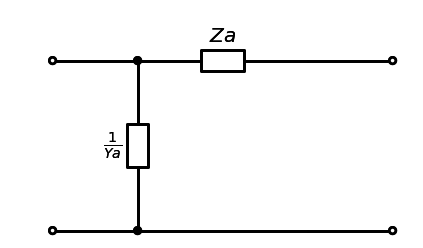

aunque no es la única manera de lograrlo, por ejemplo convirtiendo a Pi mediante la matriz Y

<IPython.core.display.Math object>

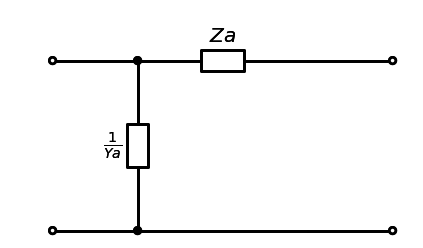

In [9]:
from pytc2.cuadripolos import TabcdZ_s, TabcdY_s, TabcdLYZ_s, TabcdLZY_s

display(Markdown('## Generación de matrices T de redes elementales (Z, Y, L)'))

print_subtitle('Z-serie')

print_latex(a_equal_b_latex_s('T_Z', TabcdZ_s(Za)))

print_subtitle('Y-derivación')

print_latex(a_equal_b_latex_s('T_Y', TabcdY_s(Ya)))

print_subtitle('Red L (Y-Z)')

TLyz = TabcdLYZ_s(Ya,Za)

print_latex(a_equal_b_latex_s('T_{Lyz}', TLyz ))

display(Markdown('por supuesto que se podría convertir la matriz T a Z y representar la red L'))

ZLyz = Tabcd2Z_s(TLyz)

print_latex(a_equal_b_latex_s('Z_{Lyz}', ZLyz ))

dibujar_Tee(ZLyz)

display(Markdown('aunque no es la única manera de lograrlo, por ejemplo convirtiendo a Pi mediante la matriz Y'))

YLyz = Tabcd2Y_s(TLyz)

print_latex(a_equal_b_latex_s('Y_{Lyz}', YLyz ))

dibujar_Pi(YLyz)



#### Red L invertida (Z-Y)

<IPython.core.display.Math object>

convirtiendo a Z se obtiene

<IPython.core.display.Math object>

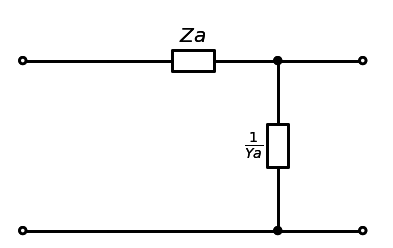

In [10]:
print_subtitle('Red L invertida (Z-Y)')

TLzy = TabcdLZY_s(Za,Ya)

print_latex(a_equal_b_latex_s('T_{Lzy}', TLzy ))

display(Markdown('convirtiendo a Z se obtiene'))

ZLzy = Tabcd2Z_s(TLzy)

print_latex(a_equal_b_latex_s('Z_{Lzy}', ZLzy ))

dibujar_Tee(ZLzy)


### Interconexión de cuadripolos

Una vez que la red se encuentra modelizada por algún juego de parámetros (Z, Y, $T_{ABCD}$, etc.) se puede proceder a la interconexión mediante las operaciones básicas del álgebra matricial:

* Conexión en cascada. Equivale a la multiplicación matricial de matrices $T_{ABCD}$.
* Conexión en serie. Suma de matrices Z.
* Conexión en paralelo. Suma de matrices Y.

Presentaremos algunos ejemplos para hallar los modelos de redes más complejas, a partir del conocimiento de las redes elementales y el concepto de interconexión.




#### Red T puenteada (bridged tee)

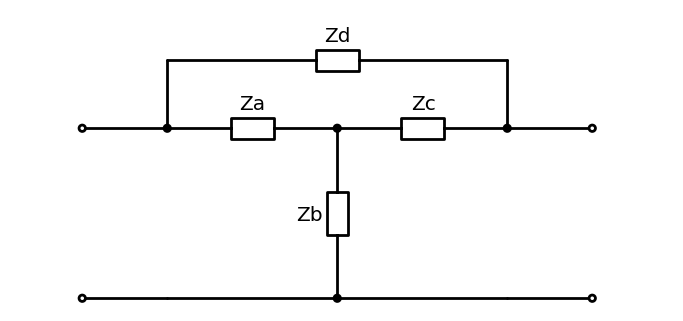

#### Matrix $T_{ABCD}$

<IPython.core.display.Math object>

In [11]:
from pytc2.dibujar import dibujar_puerto_salida, dibujar_puerto_entrada
from schemdraw import Drawing
from schemdraw.elements import ResistorIEC, Line, Resistor, Capacitor

print_subtitle('Red T puenteada (bridged tee)')

Zd, Ze, Zf = sp.symbols('Zd, Ze, Zf', complex=True)

Ttp = Y2Tabcd_s( Tabcd2Y_s(TabcdZ_s(1/Zd)) + Zt**-1 )

# dibujamos la red T-puenteada
with Drawing() as d:
    d.config(fontsize=16, unit=4)
    d = dibujar_puerto_entrada(d, port_name = '' )
    d.push()
    d += (line_start_aux := Line().length(d.unit*.4).up())
    d.pop()
    d += ResistorIEC().right().label('Za').dot().idot()
    d.push()
    d += ResistorIEC().right().label('Zc').dot()
    d.push()
    d += (line_end_aux := Line().length(d.unit*.4).up())
    d.pop()
    d = dibujar_puerto_salida(d, port_name = '' )
    d.pop()
    d += ResistorIEC().down().label('Zb').dot()
    y_down  = d.here[1]
    d += Line().endpoints( [line_start_aux.end[0], y_down ], [line_end_aux.end[0], y_down ])
    d += ResistorIEC().down().label('Zd').endpoints(line_start_aux.end, line_end_aux.end)

print_subtitle('Matrix $T_{ABCD}$')

print_latex(a_equal_b_latex_s('T_{TP}', Ttp ))

#### Red doble T (twin tee - notch RC)

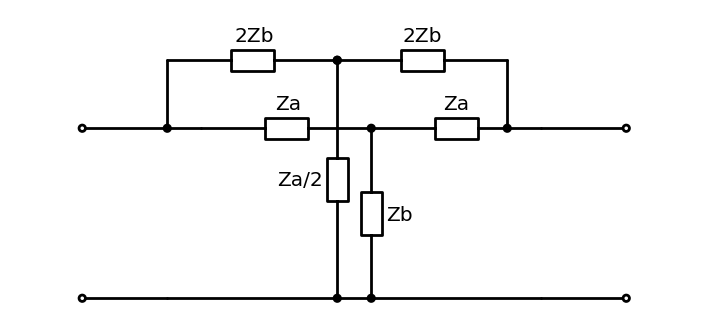

#### Matrix $T_{ABCD}$

<IPython.core.display.Math object>

In [12]:
print_subtitle('Red doble T (twin tee - notch RC)')

Zt2 = sp.Matrix([[2*Zb+Za/2, Za/2], [Za/2, 2*Zb+Za/2]])

# dibujamos la red T-puenteada
with Drawing() as d:
    d.config(fontsize=16, unit=4)
    d = dibujar_puerto_entrada(d, port_name = '' )
    d.push()
    d += Line().length(d.unit*.4).up().idot()
    d += (zb_up := ResistorIEC().right().label('2Zb').dot())
    d += ResistorIEC().right().label('2Zb')   
    d += Line().length(d.unit*.4).down().dot()
    d.pop()
    d += Line().length(d.unit*.2).right()
    d += ResistorIEC().right().label('Za').dot()
    d.push()
    d += (za_down := ResistorIEC().right().label('Za'))
    d = dibujar_puerto_salida(d, port_name = '' )
    d.pop()
    d += ResistorIEC().label('Zb', loc='bottom').down().dot()
    y_down  = d.here[1]
    d += ResistorIEC().down().label('Za/2').idot().dot().endpoints( zb_up.end, [zb_up.end[0], y_down ])
    d += Line().endpoints( [zb_up.start[0], y_down ], [za_down.end[0], y_down ])
    

Ttt = Y2Tabcd_s( Tabcd2Y_s(Zt2**-1 + Zt.subs(Zc, Za) **-1) )

print_subtitle('Matrix $T_{ABCD}$')

print_latex(a_equal_b_latex_s('T_{TT}', Ttt ))

# Redes desbalanceadas convertidas a balanceadas

#### Red desbalanceada original

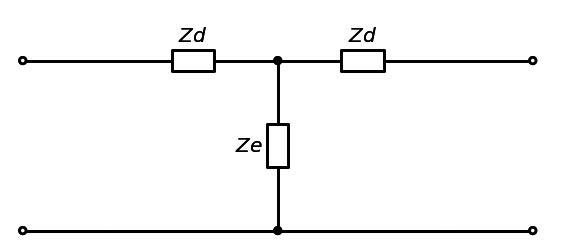

#### Matrix $Z_{t3}$

<IPython.core.display.Math object>

#### Red lattice simétrica (balanceada)

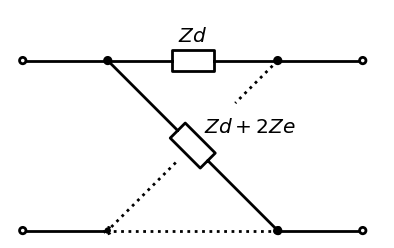

In [13]:
display(Markdown('# Redes desbalanceadas convertidas a balanceadas'))

print_subtitle('Red desbalanceada original')

# fuerzo la red Tee simétrica Za = Zc
Zt3 = sp.Matrix([[Zd+Ze, Ze], [Ze, Zd+Ze]])

dibujar_Tee(Zt3)

print_subtitle('Matrix $Z_{t3}$')

print_latex(a_equal_b_latex_s('Z_{t3}', Zt3 ))

print_subtitle('Red lattice simétrica (balanceada)')

dibujar_lattice(Zt3)

#### Red desbalanceada original

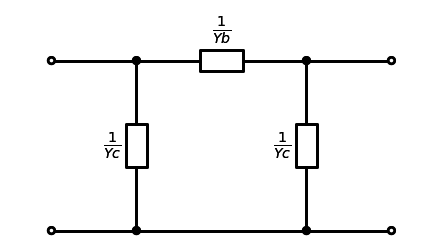

#### Matrix $Y_{\pi}$

<IPython.core.display.Math object>

#### Red lattice simétrica (balanceada)

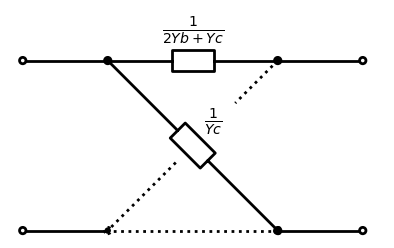

la conversión a una red balanceada puede realizarse sin problemas, tanto desde una red Tee como de una red Pi. Veremos si lo recíproco se cumple también.

In [14]:
Ypi2 = sp.Matrix([[Yc+Yb, -Yb], [-Yb, Yc+Yb]])

print_subtitle('Red desbalanceada original')

dibujar_Pi(Ypi2)

print_subtitle('Matrix $Y_{\pi}$')

print_latex(a_equal_b_latex_s('Y_{\\pi}', Ypi2 ))

print_subtitle('Red lattice simétrica (balanceada)')

dibujar_lattice(Ypi2**-1)

display(Markdown('la conversión a una red balanceada puede realizarse sin problemas, tanto desde una red Tee como de una red Pi. Veremos si lo recíproco se cumple también.'))

# Redes balanceadas convertidas a desbalanceadas

#### Red lattice simétrica (balanceada)

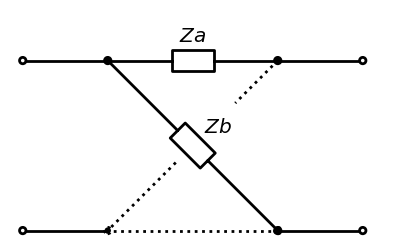

<IPython.core.display.Math object>

si implementamos una red balanceada como desbalanceada se obtiene una red Tee como la siguiente

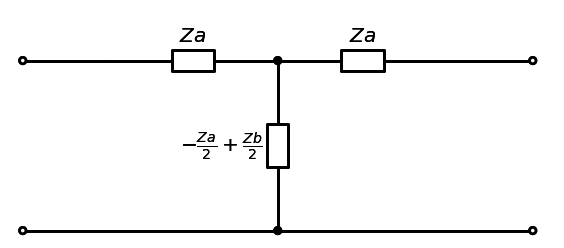

o una Pi

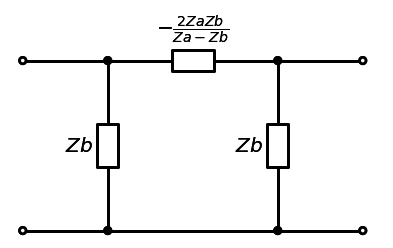

notar que la conversión a desbalanceado **NO SIEMPRE** puede realizarse por la diferencia entre inmitancias

In [15]:
display(Markdown('# Redes balanceadas convertidas a desbalanceadas'))

print_subtitle('Red lattice simétrica (balanceada)')

Zlat = sp.Matrix([[(Za+Zb)/2, (Zb-Za)/2], [(Zb-Za)/2, (Za+Zb)/2]])

dibujar_lattice(Zlat)

print_latex(a_equal_b_latex_s('T_{lat}', Zlat ))

display(Markdown('si implementamos una red balanceada como desbalanceada se obtiene una red Tee como la siguiente'))

dibujar_Tee(Zlat)

display(Markdown('o una Pi'))

dibujar_Pi(Zlat**-1)

display(Markdown('notar que la conversión a desbalanceado **NO SIEMPRE** puede realizarse por la diferencia entre inmitancias'))

